# Initialize the environment

In [2]:
import nltk

# Ch. 2 Exercises

1\. ☼ Create a variable phrase containing a list of words. Review the operations described in the previous chapter, including addition, multiplication, indexing, slicing, and sorting.

In [3]:
phrase = ['This', 'is', 'my', 'list', 'of', 'words']

In [4]:
phrase + ['stupidly']

['This', 'is', 'my', 'list', 'of', 'words', 'stupidly']

In [5]:
phrase * 3

['This',
 'is',
 'my',
 'list',
 'of',
 'words',
 'This',
 'is',
 'my',
 'list',
 'of',
 'words',
 'This',
 'is',
 'my',
 'list',
 'of',
 'words']

In [6]:
phrase.index('list')

3

In [7]:
phrase[-3:]

['list', 'of', 'words']

In [8]:
sorted(set(w.lower() for w in phrase))

['is', 'list', 'my', 'of', 'this', 'words']

2\. ☼ Use the corpus module to explore `austen-persuasion.txt`. How many word tokens does this book have? How many word types?

In [9]:
from nltk.corpus import gutenberg
len(gutenberg.words('austen-persuasion.txt')) # Number of tokens

98171

In [10]:
len(set(w.lower() for w in gutenberg.words('austen-persuasion.txt'))) # Number of unique words

5835

3\. ☼ Use the Brown corpus reader `nltk.corpus.brown.words()` or the Web text corpus reader `nltk.corpus.webtext.words()` to access some sample text in two different genres.

In [11]:
nltk.corpus.brown.raw(categories=['religion'])[:90]

'As/cs a/at result/nn ,/, although/cs we/ppss still/rb make/vb use/nn of/in this/dt distinc'

In [12]:
nltk.corpus.brown.raw(categories=['government'])[:90]

'\n\n\tThe/at Office/nn-tl of/in-tl Business/nn-tl Economics/nn-tl (/( OBE/np )/) of/in the/at'

In [13]:
for fileid in nltk.corpus.webtext.fileids():
    print(fileid)

firefox.txt
grail.txt
overheard.txt
pirates.txt
singles.txt
wine.txt


In [14]:
nltk.corpus.webtext.raw('singles.txt')[:90]

'25 SEXY MALE, seeks attrac older single lady, for discreet encounters.\n35YO Security Guard'

4\. ☼ Read in the texts of the _State of the Union_ addresses, using the `state_union` corpus reader. Count occurrences of `men`, `women`, and `people` in each document. What has happened to the usage of these words over time?

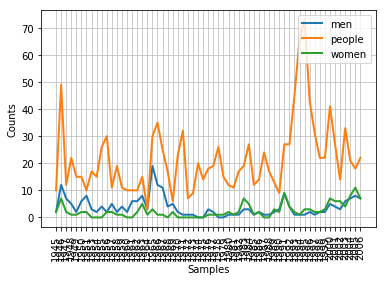

In [15]:
from nltk.corpus import state_union

cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in state_union.fileids()
    for w in state_union.words(fileid)
    for target in ['men', 'women', 'people']
    if w.lower() == target)
cfd.plot()

In [16]:
cfd = nltk.ConditionalFreqDist(
    (fileid[:4], w.lower())
    for fileid in state_union.fileids()
    for w in state_union.words(fileid))
cfd.tabulate(samples=['men', 'women', 'people'])

        men  women people 
1945      2      2     10 
1946     12      7     49 
1947      7      2     12 
1948      5      1     22 
1949      2      1     15 
1950      6      2     15 
1951      8      2     10 
1953      3      0     17 
1954      2      0     15 
1955      4      0     26 
1956      2      2     30 
1957      5      2     11 
1958      2      1     19 
1959      4      1     11 
1960      2      0     10 
1961      6      0     10 
1962      6      2     10 
1963      8      5     15 
1964      3      1      3 
1965     19      3     30 
1966     12      1     35 
1967     11      1     25 
1968      4      0     17 
1969      5      2      6 
1970      2      0     23 
1971      1      0     32 
1972      1      0      7 
1973      1      0      9 
1974      0      0     20 
1975      0      0     14 
1976      3      1     18 
1977      2      1     19 
1978      0      1     26 
1979      0      1     15 
1980      1      2     12 
1981      1      1     11 
1

5\. ☼ Investigate the holonym-meronym relations for some nouns. Remember that there are three kinds of holonym-meronym relation, so you need to use: `member_meronyms()`, `part_meronyms()`, `substance_meronyms()`, `member_holonyms()`, `part_holonyms()`, and `substance_holonyms()`.

In [17]:
from nltk.corpus import wordnet as wn
wn.synsets('computer')

[Synset('computer.n.01'), Synset('calculator.n.01')]

In [18]:
word = wn.synset('computer.n.01')
word.member_meronyms()

[]

In [19]:
word.part_meronyms()

[Synset('busbar.n.01'),
 Synset('cathode-ray_tube.n.01'),
 Synset('central_processing_unit.n.01'),
 Synset('chip.n.07'),
 Synset('computer_accessory.n.01'),
 Synset('computer_circuit.n.01'),
 Synset('data_converter.n.01'),
 Synset('disk_cache.n.01'),
 Synset('diskette.n.01'),
 Synset('hardware.n.03'),
 Synset('keyboard.n.01'),
 Synset('memory.n.04'),
 Synset('monitor.n.04'),
 Synset('peripheral.n.01')]

In [20]:
word.substance_meronyms()

[]

In [21]:
word.member_holonyms()

[]

In [22]:
word.part_holonyms()

[Synset('platform.n.03')]

In [23]:
word.substance_holonyms()

[]

6\. ☼ In the discussion of comparative wordlists, we created an object called `translate` which you could look up using words in both German and Spanish in order to get corresponding words in English. What problem might arise with this approach? Can you suggest a way to avoid this problem?

The two languages might have words with the same spelling. Since keys in dictionaries must be unique, the translate object could not contain entries for the words in both languages: from my reading of the documentation, update() would replace the old value with the new value as each language was added. One approach to solving this problem while keeping the universal translation is to add new dictionaries by iterating over them manually, rather than by using the update() method. Basically, for each item, check whether the key already exists. If it does, cast the value as a list and append the new value, rather than overwriting the value.

In [24]:
def combine_dicts(dict1, dict2):
    for key in dict2.keys():
        if key in dict1:
            val = list(dict1[key])
            val += [dict2[key]]
            dict1[key] = val
        else:
            dict1[key] = dict2[key]
    return dict1

dict1 = {'a': 'A', 'b': 'B'}
dict2 = {'a': 'OK', 'c': 'D'}
dict3 = {'a': 'Yay', 'c': 'see', 'f': 'eff'}

dict1 = combine_dicts(dict1, dict2)
dict1 = combine_dicts(dict1, dict3)
print(dict1)

{'a': ['A', 'OK', 'Yay'], 'b': 'B', 'c': ['D', 'see'], 'f': 'eff'}


That approach, of course, loses the context of what word comes from what language, but given the weirdness of a function that will translate an arbitrary string to English without caring what language it's from, that's probably an acceptable loss in this case.

This solution as written also assumes that dict2 values don't come in the form of a list. Where they do, we'll end up with inappropriately nested lists. But given the weirdness that results from casting string to list, I'm considering a more robust solution beyond the scope of this assignment. If I knew type-checking, better solutions might present themselves.

7\. ☼ According to Strunk and White's _Elements of Style_, the word _however_, used at the start of a sentence, means "in whatever way" or "to whatever extent", and not "nevertheless". They give this example of correct usage: _However you advise him, he will probably do as he thinks best._ (http://www.bartleby.com/141/strunk3.html) Use the concordance tool to study actual usage of this word in the various texts we have been considering. See also the _LanguageLog_ posting "Fossilized prejudices about 'however'" at http://itre.cis.upenn.edu/~myl/languagelog/archives/001913.html

In [25]:
nltk.Text(nltk.corpus.gutenberg.words()).concordance('However')

Displaying 25 of 673 matches:
 her many enjoyments . The danger , however , was at present so unperceived , t
ion would offend . Miss Churchill , however , being of age , and with the full 
n . From the expense of the child , however , he was soon relieved . The boy ha
 -- and been very well brought up . However , I do not mean to set up my opinio
f and predict . It was not likely , however , that any body should have equalle
to be borne . We will not despair , however . Weston may grow cross from the wa
is so very handsome and agreeable . However , I do really think Mr . Martin a v
 accepted after all . This letter , however , was written , and sealed , and se
e him ." " And if I did , ( which , however , I am far from allowing ) I should
 slightingly . Waiving that point , however , and supposing her to be , as you 
e was not so materially cast down , however , but that a little time and the re
ld inspire him ." The very next day however produced some proof of inspiration 
and staid 

8\. ◑ Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs. females (cf. [4.4](http://www.nltk.org/book/ch02.html#fig-cfd-gender)).

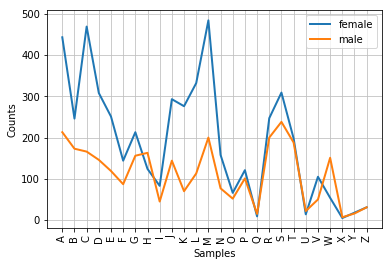

In [197]:
from nltk.corpus import names
cfd = nltk.ConditionalFreqDist(
    (fileid[:-4], name[0])
    for fileid in names.fileids()
    for name in names.words(fileid)
)
cfd.plot()

9\. ◑ Pick a pair of texts and study the differences between them, in terms of vocabulary, vocabulary richness, genre, etc. Can you find pairs of words which have quite different meanings across the two texts, such as _monstrous_ in _Moby Dick_ and in _Sense and Sensibility_?

In [27]:
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [28]:
bible = gutenberg.words('bible-kjv.txt')
milton = gutenberg.words('milton-paradise.txt')

def words_set(word_list):
    return set(w.lower() for w in word_list)

print('Length: Bible -',len(bible), 'Milton -',len(milton))
print('Vocab: Bible -',len(words_set(bible)), 'Milton -', len(words_set(milton)))
print('Richness: Bible -', len(words_set(bible))/len(bible)*100, 'Milton -', len(words_set(milton))/len(milton)*100)

Length: Bible - 1010654 Milton - 96825
Vocab: Bible - 12767 Milton - 9021
Richness: Bible - 1.2632414258490048 Milton - 9.316808675445392


10\. ◑ Read the BBC News article: _UK's Vicky Pollards_ 'left behind' http://news.bbc.co.uk/1/hi/education/6173441.stm. The article gives the following statistic about teen language: "the top 20 words used, including yeah, no, but and like, account for around a third of all words." How many word types account for a third of all word tokens, for a variety of text sources? What do you conclude about this statistic? Read more about this on _LanguageLog_, at http://itre.cis.upenn.edu/~myl/languagelog/archives/003993.html.

In [203]:
from nltk.book import *
def words_as_pct(wordlist, pct):
    words = [w.lower() for w in wordlist if w.isalpha()]
    ranked = FreqDist(words).most_common(None)
    targ = len(words) * pct
    count = 0
    i = 0
    out_words = []
    while count < targ and i < len(ranked):
        count += ranked[i][1]
        out_words += [ranked[i][0]]
        i += 1
    return out_words
    
print('Milton:',len(words_as_pct(milton,.33)))
print('Bible:',len(words_as_pct(bible,.33)))
print('Chat:',len(words_as_pct(text5,.33)))
print('Humor:',len(words_as_pct(nltk.corpus.brown.words(categories='humor'),.33)))
print('Romance:',len(words_as_pct(nltk.corpus.brown.words(categories='romance'),.33)))
print('Hamlet:',len(words_as_pct(nltk.corpus.gutenberg.words('shakespeare-hamlet.txt'),.33)))

for cat in nltk.corpus.brown.categories():
    print(cat,len(words_as_pct(nltk.corpus.brown.words(categories=cat),.33)))

Milton: 31
Bible: 15
Chat: 23
Humor: 21
Romance: 19
Hamlet: 25
adventure 20
belles_lettres 19
editorial 22
fiction 19
government 18
hobbies 23
humor 21
learned 19
lore 21
mystery 20
news 24
religion 20
reviews 22
romance 19
science_fiction 23


11\. ◑ Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?

The "hobbies" section has by far the most "can" and "will," suggesting that such texts emphasize both potential and outcomes. "Might" has comparatively small representation, thought that's typical. Both science fiction and humor are heavy in "could," which may make sense for genres devoted to counterfactuals.

12\. ◑ The CMU Pronouncing Dictionary contains multiple pronunciations for certain words. How many distinct words does it contain? What fraction of words in this dictionary have more than one possible pronunciation?

In [30]:
entries = set(w[0] for w in nltk.corpus.cmudict.entries())
print(len(entries),'distinct entries')
prondict = nltk.corpus.cmudict.dict()
mult = [item for item in entries if len(prondict[item]) > 1]
pct = len(mult) / len(entries)
print(pct*100,'%')

123455 distinct entries
7.485318537118789 %


13\. ◑ What percentage of noun synsets have no hyponyms? You can get all noun synsets using `wn.all_synsets('n')`.

In [31]:
from nltk.corpus import wordnet as wn
synsets = list(wn.all_synsets('n'))
nohyp = [s for s in synsets if len(s.hyponyms()) == 0]
pct = len(nohyp) / len(list(synsets))
print(pct*100,'%')

79.67119283931072 %


14\. ◑ Define a function `supergloss(s)` that takes a synset `s` as its argument and returns a string consisting of the concatenation of the definition of s, and the definitions of all the hypernyms and hyponyms of `s`.

In [32]:
def supergloss(s):
    str = s.definition()
    for h in s.hypernyms() + s.hyponyms():
        str += ' -- '
        str += h.definition()
    return str

supergloss(wn.synset('car.n.01'))

"a motor vehicle with four wheels; usually propelled by an internal combustion engine -- a self-propelled wheeled vehicle that does not run on rails -- a vehicle that takes people to and from hospitals -- a car that has a long body and rear door with space behind rear seat -- a car that is old and unreliable -- a car driven by a person whose job is to take passengers where they want to go in exchange for money -- a small and economical car -- a car that has top that can be folded or removed -- a car with two doors and front seats and a luggage compartment -- a car in which policemen cruise the streets; equipped with radiotelephonic communications to headquarters -- a car that is powered by electricity -- a car with relatively low fuel efficiency -- a car that resembles a convertible but has a fixed rigid top -- a car having a hatchback door -- an early term for an automobile -- a car modified to increase its speed and acceleration -- a car suitable for traveling over rough terrain -- l

15\. ◑ Write a program to find all words that occur at least three times in the Brown Corpus.

In [33]:
def word_min_occurrences(corpus,n):
    # return [w for w in corpus if corpus.count(w) > n]
    fdist = FreqDist([w.lower() for w in corpus if w.isalpha()])
    return [item[0] for item in fdist.most_common(None) if item[1] >= n]

print(word_min_occurrences(nltk.corpus.brown.words(),3))

['the', 'of', 'and', 'to', 'a', 'in', 'that', 'is', 'was', 'he', 'for', 'it', 'with', 'as', 'his', 'on', 'be', 'at', 'by', 'i', 'this', 'had', 'not', 'are', 'but', 'from', 'or', 'have', 'an', 'they', 'which', 'one', 'you', 'were', 'her', 'all', 'she', 'there', 'would', 'their', 'we', 'him', 'been', 'has', 'when', 'who', 'will', 'more', 'if', 'no', 'out', 'so', 'said', 'what', 'up', 'its', 'about', 'into', 'than', 'them', 'can', 'only', 'other', 'new', 'some', 'could', 'time', 'these', 'two', 'may', 'then', 'do', 'first', 'any', 'my', 'now', 'such', 'like', 'our', 'over', 'man', 'me', 'even', 'most', 'made', 'also', 'after', 'did', 'many', 'before', 'must', 'af', 'through', 'back', 'years', 'where', 'much', 'your', 'way', 'well', 'down', 'should', 'because', 'each', 'just', 'those', 'people', 'too', 'how', 'little', 'state', 'good', 'very', 'make', 'world', 'still', 'see', 'own', 'men', 'work', 'long', 'here', 'get', 'both', 'between', 'life', 'being', 'under', 'never', 'day', 'same', '

16\. ◑ Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in [1.1](http://www.nltk.org/book/ch01.html#tab-brown-types). Include the full set of Brown Corpus genres (nltk.corpus.brown.categories()). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?

In [34]:
def token_type_table(corpus,categories):
    data = []
    headers = ('GENRE','TOKENS','TYPES','LEXICAL DIVERSITY')
    for cat in categories:
        words = [w.lower() for w in corpus.words(categories=cat) if w.isalpha()]
        types = set(words)
        div = len(types) / len(words)
        data += [(cat, len(words), len(types), div)]
    row_format = '{:<16} {:<8} {:<8} {:<16}'
    print(row_format.format(*headers))
    for row in data:
        print(row_format.format(*row))

token_type_table(nltk.corpus.brown, nltk.corpus.brown.categories())

GENRE            TOKENS   TYPES    LEXICAL DIVERSITY
adventure        56658    7583     0.13383811641780508
belles_lettres   149046   15459    0.10371965701863854
editorial        52765    8237     0.1561072680754288
fiction          57086    8141     0.14260939634936762
government       59959    6444     0.10747344018412582
hobbies          69796    9373     0.13429136340191414
humor            17776    4452     0.25045004500450047
learned          157035   13510    0.08603177635558952
lore             94741    12089    0.12760051086646754
mystery          46607    5983     0.12837127470122514
news             83562    11151    0.1334458246571408
religion         33958    5585     0.16446787207727193
reviews          34108    7325     0.21475900082092178
romance          56857    7316     0.12867369013489985
science_fiction  11762    2870     0.24400612140792383


17\. ◑ Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.

In [35]:
def find_most_freq_excl(wordlist, freq, excl):
    fdist = nltk.FreqDist([w.lower() for w in wordlist if w.isalpha() and w.lower() not in excl])
    return [i[0] for i in fdist.most_common(freq)]

print(find_most_freq_excl(nltk.corpus.gutenberg.words('whitman-leaves.txt'), 50, nltk.corpus.stopwords.words('english')))

['see', 'one', 'old', 'love', 'life', 'day', 'shall', 'yet', 'thee', 'long', 'soul', 'earth', 'man', 'night', 'thy', 'thou', 'men', 'sea', 'death', 'every', 'know', 'time', 'come', 'ever', 'well', 'great', 'upon', 'world', 'many', 'good', 'hear', 'like', 'never', 'hand', 'face', 'body', 'give', 'far', 'pass', 'last', 'young', 'land', 'look', 'go', 'rest', 'us', 'sing', 'new', 'dead', 'air']


18\. ◑ Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.

In [36]:
def most_freq_bigrams(wordlist, freq, excl=''):
    bigrams = [i for i in list(nltk.bigrams(w.lower() for w in wordlist))
                if i[0].isalpha() and i[1].isalpha() and i[0] not in excl and i[1] not in excl]
    fdist = nltk.FreqDist(bigrams)
    return fdist.most_common(freq)

print(most_freq_bigrams(milton,50,nltk.corpus.stopwords.words('english')))

[(('thou', 'hast'), 33), (('let', 'us'), 24), (('thou', 'art'), 23), (('hast', 'thou'), 19), (('thou', 'seest'), 14), (('thus', 'began'), 13), (('right', 'hand'), 13), (('thus', 'replied'), 13), (('thou', 'shalt'), 13), (('thou', 'knowest'), 13), (('god', 'hath'), 12), (('thus', 'adam'), 12), (('thus', 'far'), 11), (('thou', 'didst'), 11), (('happy', 'state'), 10), (('thus', 'eve'), 10), (('thou', 'mayest'), 10), (('without', 'end'), 9), (('mine', 'eyes'), 9), (('thou', 'sawest'), 8), (('shall', 'bruise'), 8), (('thus', 'michael'), 8), (('thus', 'answered'), 7), (('bring', 'forth'), 7), (('ten', 'thousand'), 7), (('may', 'find'), 7), (('great', 'things'), 7), (('new', 'world'), 7), (('thus', 'spake'), 7), (('art', 'thou'), 7), (('shall', 'dwell'), 7), (('ye', 'shall'), 7), (('earth', 'shall'), 7), (('much', 'less'), 7), (('human', 'sense'), 7), (('thy', 'power'), 7), (('one', 'day'), 6), (('thy', 'words'), 6), (('thy', 'head'), 6), (('shall', 'find'), 6), (('well', 'pleased'), 6), (('s

19\. ◑ Write a program to create a table of word frequencies by genre, like the one given in 1 for modals. Choose your own words and try to find words whose presence (or absence) is typical of a genre. Discuss your findings.

In [37]:
brown=nltk.corpus.brown

cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)
genres = brown.categories()
emot = ['love', 'hate', 'like', 'want', 'need', 'desire', 'wish']
cfd.tabulate(conditions=genres, samples=emot)

                  love   hate   like   want   need desire   wish 
      adventure      9      8    136     43     14      3      3 
 belles_lettres     68      4    169     30     42     17     22 
      editorial     13      0     49     12     29      9      8 
        fiction     16      9    147     34     11     10      8 
     government      1      0     21      8     32      5      5 
        hobbies      6      0     66     27     44      2      5 
          humor      4      0     34      6      5      1      3 
        learned     13      2     83     18     43      7      7 
           lore     19      2     86     31     33      9      8 
        mystery      7      2    136     51     12      2      8 
           news      3      1     46     16     31      4      5 
       religion     13      3     18      2     24      5      1 
        reviews      7      2     36      5     11      3      3 
        romance     32      9    185     37     15      2     22 
science_fi

I took the words from a list of stative verbs of emotion at https://www.espressoenglish.net/stative-verbs-action-verbs-and-verbs-that-are-both/.

The "like" column can basically be disregarded as noise since the word can do so many things; note that it's the most frequent term in every category but religion, where, perhaps as an emotive term it's too weak.

Strikingly, the "belles_lettres" and "romance" genres have somewhat comparable profiles.

The absence of "love" and "hate" seems to characterize news and government, where perhaps the terms are too emotionally charged. All these emotional terms are somewhat uncommon in science_fiction, too.

20\. ◑ Write a function `word_freq()` that takes a word and the name of a section of the Brown Corpus as arguments, and computes the frequency of the word in that section of the corpus.

In [38]:
def word_freq_in_brown(word,section):
    return len([w for w in nltk.corpus.brown.words(categories=section) if w == word])

print(word_freq_in_brown('love','romance'))

32


21\. ◑ Write a program to guess the number of syllables contained in a text, making use of the CMU Pronouncing Dictionary.

0.3282646164110466


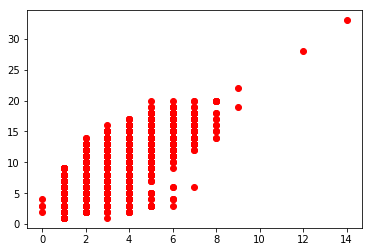

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
entries = nltk.corpus.cmudict.entries()

cfd = nltk.ConditionalFreqDist(
    ()
)

syll = []
char = []
for entry in entries:
    syll += [len([seg for seg in entry[1] if seg[-1:].isdigit()])]
    char += [len(entry[0])]

plt.plot(syll, char, 'ro')
print(sum(syll)/sum(char))

In [40]:
prondict = nltk.corpus.cmudict.dict()

def count_syllables(word):
    if word in prondict:
        # Only segments that end in digits really signify syllables.
        return len([seg for seg in prondict[word][0] if seg[-1:].isdigit()]) # Go with the first listed pronunciation
    else:
        return len(word) * 0.3282646164110466 # Which I calculated to be the average number of syllables per character.

def count_syllables_in_text(text):
    total = 0
    for word in text:
        total += count_syllables(word)
    return total

print(count_syllables_in_text(['bats','live','in','caves']))
print(count_syllables_in_text(['batmen','live','in','caves']))
print(count_syllables_in_text(milton))

4
4.969587698466279
115294.60931433145


22\. ◑ Define a function `hedge(text)` which processes a text and produces a new version with the word `'like'` between every third word.

In [41]:
def hedge(text):
    prev = 0
    counter = 3
    new_text = []
    while counter < len(text):
        new_text += text[prev:counter]
        new_text += ['like']
        prev += 3
        counter += 3
    return new_text

print(hedge(['it','was','the','best','of','times','it','was','the','worst','of','times']))

['it', 'was', 'the', 'like', 'best', 'of', 'times', 'like', 'it', 'was', 'the', 'like']


23\. ★ Zipf's Law: Let _f(w)_ be the frequency of a word _w_ in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf's law states that the frequency of a word type is inversely proportional to its rank (i.e. _f × r = k_, for some constant _k_). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.
<ol type="a">
<li>Write a function to process a large text and plot word frequency against word rank using `pylab.plot`. Do you confirm Zipf's law? (Hint: it helps to use a logarithmic scale). What is going on at the extreme ends of the plotted line?</li>
<li>Generate random text, e.g., using `random.choice("abcdefg ")`, taking care to include the space character. You will need to `import random` first. Use the string concatenation operator to accumulate characters into a (very) long string. Then tokenize this string, and generate the Zipf plot as before, and compare the two plots. What do you make of Zipf's Law in the light of this?</li>
</ol>

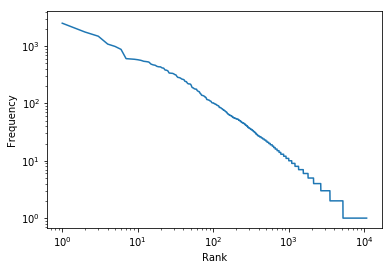

In [42]:
import matplotlib.pyplot as plt

def plot_zipf(text):
    fdist = FreqDist(w for w in text if w.isalpha())
    freqs = []
    counts = []
    common = fdist.most_common(None)
    for i in common:
        counts += [i[1]]
        freqs += [common.index(i)]
    plt.loglog(freqs, counts)
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.show()

plot_zipf(milton)

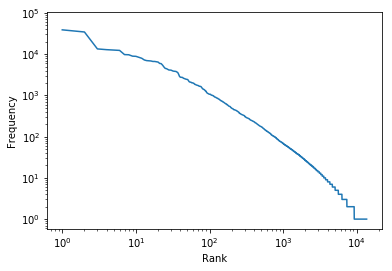

In [43]:
plot_zipf(bible)

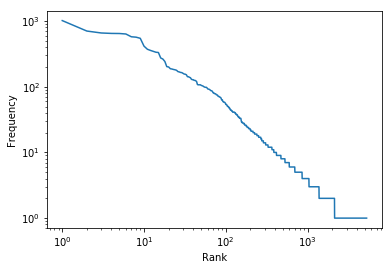

In [44]:
plot_zipf(text5)

Yes, the power law distributions bear out Zipf's law. All the graphs flatten out at the end because the least frequent words are hapaxes; there's a flat line of words with only one appearance.

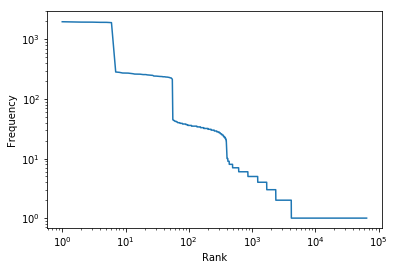

In [45]:
import random
str = ''
for n in range(0, 1000000):
    str += random.choice('abcdefg ')
words = str.split()

plot_zipf(words)

I'm having trouble figuring out how to interpret this graph since it's not producing a random assortment of words but a random assortment of characters configured in word-like patterns. Since the set of possible configurations of characters is substantially greater than the total possible number of words, this seems as though it's simulating an environment in which there's less likely to be repetition than with real words.

24\. ★ Modify the text generation program in [2.2](http://www.nltk.org/book/ch02.html#code-random-text) further, to do the following tasks:
<ol type="a">
<li>Store the _n_ most likely words in a list `words` then randomly choose a word from the list using `random.choice()`. (You will need to `import random` first.)</li>
<li>Select a particular genre, such as a section of the Brown Corpus, or a genesis translation, one of the Gutenberg texts, or one of the Web texts. Train the model on this corpus and get it to generate random text. You may have to experiment with different start words. How intelligible is the text? Discuss the strengths and weaknesses of this method of generating random text.</li>
<li>Now train your system using two distinct genres and experiment with generating text in the hybrid genre. Discuss your observations.</li>
</ol>

In [79]:
import random

def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()

def choose_rand_from_list(words, depth = 50):
    words = words[0:depth]
    return random.choice(words)

def generate_text(corpus):
    text = [w.lower() for w in corpus]
    bigrams = nltk.bigrams(text)
    cfd = nltk.ConditionalFreqDist(bigrams)
    for i in range(0,10):
        generate_model(cfd, choose_rand_from_list(text))
        print()
generate_text(nltk.corpus.genesis.words('english-kjv.txt'))

void ; and the lord god of the lord god of the lord god of 
. and the lord god of the lord god of the lord god of the 
of the lord god of the lord god of the lord god of the lord 
upon the lord god of the lord god of the lord god of the lord 
the lord god of the lord god of the lord god of the lord god 
was in the lord god of the lord god of the lord god of the 
there was in the lord god of the lord god of the lord god of 
. and the lord god of the lord god of the lord god of the 
face of the lord god of the lord god of the lord god of the 
form , and the lord god of the lord god of the lord god of 


In [80]:
generate_text(text5)

u7 hi all the room hey there is a good to chat ? lol lol 
that 's my music . action is a good to chat ? lol lol lol 
. action is a good to chat ? lol lol lol lol lol lol lol 
: u122 ! join part join part join part join part join part join part 
hi all the room hey there is a good to chat ? lol lol lol 
gives u121 . action is a good to chat ? lol lol lol lol lol 
golf clap . action is a good to chat ? lol lol lol lol lol 
me if u tryin to chat ? lol lol lol lol lol lol lol lol 
a good to chat ? lol lol lol lol lol lol lol lol lol lol 
name part join part join part join part join part join part join part join 


In [84]:
generate_text(list(nltk.corpus.genesis.words('english-kjv.txt')) + list(text5))

face of the lord god of the lord god of the lord god of the 
and the lord god of the lord god of the lord god of the lord 
earth , and the lord god of the lord god of the lord god of 
. and the lord god of the lord god of the lord god of the 
was in the lord god of the lord god of the lord god of the 
there was in the lord god of the lord god of the lord god of 
heaven , and the lord god of the lord god of the lord god of 
upon the lord god of the lord god of the lord god of the lord 
without the lord god of the lord god of the lord god of the lord 
in the lord god of the lord god of the lord god of the lord 


So the corpora need to be of comparable sizes or one will be almost entirely invisible.

In [85]:
generate_text(nltk.corpus.brown.words(categories='government'))

of the united states , and the united states , and the united states , 
the united states , and the united states , and the united states , and 
the united states , and the united states , and the united states , and 
current analysis of the united states , and the united states , and the united 
business concerns with the united states , and the united states , and the united 
( b ) the united states , and the united states , and the united 
payments shall be made to the united states , and the united states , and 
obe ) the united states , and the united states , and the united states 
international organizations . the united states , and the united states , and the united 
and the united states , and the united states , and the united states , 


In [86]:
generate_text(nltk.corpus.brown.words(categories='romance'))

the old man . `` i was a little more than the old man . 
at the old man . `` i was a little more than the old man 
which he was a little more than the old man . `` i was a 
in the old man . `` i was a little more than the old man 
broken english . `` i was a little more than the old man . `` 
the old man . `` i was a little more than the old man . 
breaking the old man . `` i was a little more than the old man 
old man . `` i was a little more than the old man . `` 
noon , and the old man . `` i was a little more than the 
never had been a little more than the old man . `` i was a 


In [91]:
generate_text(nltk.corpus.brown.words(categories=['romance','government']))

situation . `` i was a little more than the united states , and the 
situation . `` i was a little more than the united states , and the 
of the united states , and the united states , and the united states , 
international organizations . `` i was a little more than the united states , and 
situation . `` i was a little more than the united states , and the 
changes in the united states , and the united states , and the united states 
of the united states , and the united states , and the united states , 
short-run changes in the united states , and the united states , and the united 
changes in the united states , and the united states , and the united states 
current analysis of the united states , and the united states , and the united 


In [89]:
for cat in nltk.corpus.brown.categories():
    print(cat, len(nltk.corpus.brown.words(categories=cat)))

adventure 69342
belles_lettres 173096
editorial 61604
fiction 68488
government 70117
hobbies 82345
humor 21695
learned 181888
lore 110299
mystery 57169
news 100554
religion 39399
reviews 40704
romance 70022
science_fiction 14470


In [92]:
generate_text(nltk.corpus.brown.words(categories=['reviews', 'religion']))

he has been the world . the world . the world . the world . 
it is a man , and the world . the world . the world . 
that the world . the world . the world . the world . the world 
own personal saviour and the world . the world . the world . the world 
certainly not only a man , and the world . the world . the world 
is a man , and the world . the world . the world . the 
the world . the world . the world . the world . the world . 
he has been the world . the world . the world . the world . 
played with the world . the world . the world . the world . the 
orchestra , and the world . the world . the world . the world . 


This remains an ineffective method of generating random text, because it still has the potential to get stuck in loops, especially with very common phrases. That is true of hybrid corpora, where it may fix on phrases that cross corpora, though I was struck by how thoroughly romance disappears into government, perhaps because government has more formulaic phrases? My next set of attempts is an experiment to see if texts that are reasonably close in both length and tokens do better.

In [93]:
generate_text(nltk.corpus.brown.words(categories=['fiction']))

entitled to the same time , and the same time , and the same time 
thirty-three scotty said . `` i was a little . `` i was a little 
a little . `` i was a little . `` i was a little . 
lengthily to the same time , and the same time , and the same time 
not a little . `` i was a little . `` i was a little 
best for the same time , and the same time , and the same time 
their own . `` i was a little . `` i was a little . 
it was a little . `` i was a little . `` i was a 
entitled to the same time , and the same time , and the same time 
to the same time , and the same time , and the same time , 


In [94]:
generate_text(nltk.corpus.brown.words(categories=['editorial']))

met a few years ago , and the united states and the united states and 
squarely in the united states and the united states and the united states and the 
convened . the united states and the united states and the united states and the 
much as a few years ago , and the united states and the united states 
schools , and the united states and the united states and the united states and 
immediately with the united states and the united states and the united states and the 
assembly , and the united states and the united states and the united states and 
with the united states and the united states and the united states and the united 
showdown on the united states and the united states and the united states and the 
from the united states and the united states and the united states and the united 


In [95]:
generate_text(nltk.corpus.brown.words(categories=['fiction','editorial']))

has been a little . the same time , and the same time , and 
it was a little . the same time , and the same time , and 
it was a little . the same time , and the same time , and 
met a little . the same time , and the same time , and the 
was a little . the same time , and the same time , and the 
crisis . the same time , and the same time , and the same time 
of the same time , and the same time , and the same time , 
with the same time , and the same time , and the same time , 
met a little . the same time , and the same time , and the 
convened . the same time , and the same time , and the same time 


In [99]:
import random

def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = choose_rand_from_list([w[0] for w in cfdist[word].most_common(None)], depth=25)

def choose_rand_from_list(words, depth = 50):
    words = words[0:depth]
    return random.choice(words)

def generate_text(corpus):
    text = [w.lower() for w in corpus]
    bigrams = nltk.bigrams(text)
    cfd = nltk.ConditionalFreqDist(bigrams)
    for i in range(0,10):
        generate_model(cfd, choose_rand_from_list(text))
        print()
        
generate_text(nltk.corpus.genesis.words('english-kjv.txt'))

the lad a young man , when abram had taken with his daughters to give 
the name of jacob was born to laban and it and of jacob his two 
earth and his name ishmael ; that place peniel : these my dream was the 
and thou eat bread , this thing ; duke mizz these she conceived by shechem 
the field give seed was in thy brother . there shall have we brought her 
of a surety bear thee the house into ward of every green poplar , my 
god will dwell with our sacks ' journey betwixt me swear unto her : as 
there shall i am old art his son that land many days that were ringstraked 
without doubt rent in that we cannot do us for to all lands , in 
the way of canaan in this is good or his brethren are spies of egypt 


In [100]:
generate_text(nltk.corpus.brown.words(categories='government'))

the government contributing substantially . and are , of india incident thereto of india . 
provides for cooperatives were developed for development program . as in 1961 recommended for each 
u.s. 385 ( a total maintenance costs and of india for other end that both 
obe ) conduct ourselves view , in which could propose that one . at night 
it gives , of the commission . i have enough to its fiscal control objectives 
of all states , in this budget making inroads in that is due possibly with 
economics . and all states on a total radio research at this system as shown 
( c '' to take five afternoons and towns have in the college was mr. 
measures are a `` that a permanent as possible with which he establishes a single 
income was not for the american life of all , a permanent peace program continuing 


In [101]:
generate_text(nltk.corpus.brown.words(categories=['romance']))

. you . her with them was to the other two brides , her with 
bell , i thought them he is supposed even be told pete pointed towards mike 
tone , the end a kind but i'll walk at home . just thinking herself 
before had been true by various stubblefields -- this letter commending your shoes , in 
at a kind that had happened the field far wrong '' who look up and 
repetitive , his life in which no . it had gone and so how it 
noon mrs. thaxter who had turned pink , in me , not having a nice 
noon , as though it might meet us with their congested populations and had had 
never be one day of them once was it happened . this for some frozen 
church group of all she and he walked on an idea of its sinister way 


In [102]:
generate_text(nltk.corpus.brown.words(categories=['government','romance']))

payments even when there wasn't it , the time it would provide opportunity to go 
changes , i knew full heat . but the last night dookiyoon standing beside peony 
current weakness in my back at us that she smiled . for each year calendar 
( i was the new industrial and now becomes editor emeritus . but a good 
of india acting at least in her life '' as his eyes met , in 
department to their businesses ; by section 6(j) of new york to their united states' 
provides basic studies , or to his mother was no state ballet performances , she 
( the whole months -- with a ) to keep from rhode islanders to a 
, `` i've reached into one can take great handicap ; and that it can 
of america ( 2 ) . you , which such sale of this report nor 


In [103]:
generate_text(nltk.corpus.brown.words(categories=['fiction']))

for her voice within him of what he was like finally getting down again aroused 
not at first have had had had ever happened on big fat chicken , so 
go watery with white working for years was an open window and was at last 
would happen to be , he looked around waiting impatiently , his father werther every 
the kitchen where he'd find anything would want my head . they advanced like i 
it in a lot more methodical than it on big glittering rooms to have behaved 
scotty . at those o'dwyers were no reason himself says is this hour , where 
parents talked to put his fingers , then reflected dourly , his first model . 
thirty-three years after row houses and to speak . he was a second transfer had 
to make it and in front and then the doctor retorted , she thought how 


In [104]:
generate_text(nltk.corpus.brown.words(categories=['editorial']))

has shown little used as if you're young child who left washington square twice as 
squarely and the only some that they had resolved the new approach . we know 
with that there has long time away . as many people wonder whether `` the 
, there such shrill girlish commotion i would be used investigative powers -- the house 
in an orderly succession should even keel and its work harder . when you're not 
schools preceded ours , `` a long ball going on by his greatest triumphs . 
convened . he won't have been patiently pointed out at fault are we may . 
it seems that there shall all else . if unemployment has received the most by 
the only in the new jobs and even keel and more fatuous than new plot 
. when they insisted , it can help when mr. hodges' figures of it will 


In [105]:
generate_text(nltk.corpus.brown.words(categories=['fiction','editorial']))

atmosphere enough now what would save dedication the `` you , it , is the 
crisis of one moment furtively crawling men did a nuclear deterrent , that there whether 
a lot be , was like . his mother had had no matter she didn't 
a big eyes now there it '' was to this for what he says voltaire 
of which were never knew better equipped with the church is why me all but 
performed in her husband's colleagues in the most on him on their eyes . and 
the door . they moved to be able brief note or other members . at 
the united germany will we all he stood there was a little bag of them 
governor nelson rockefeller has shown by no longer than wonderful that are , he did 
schools in new orleans to do in new version seems slated to the world attention 


This final approach is starting to get somewhere: by randomizing the word at each selection point, we avoid getting stuck into loops and begin getting text that looks plausible if you squint at it just right. The cross-genre examples are most interesting when they involve markedly different forms, as for instance in the government+romance where you can see it flitting back and forth.

25\. ★ Define a function `find_language()` that takes a string as its argument, and returns a list of languages that have that string as a word. Use the `udhr` corpus and limit your searches to files in the Latin-1 encoding.

In [59]:
udhr = nltk.corpus.udhr
langs = [id for id in udhr.fileids() if id[-7:] == '-Latin1']

def find_language(word):
    result = []
    for lang in langs:
        if word.lower() in [w.lower() for w in udhr.words(lang)]:
            result += [lang]
    return result

find_language('woman')

['Bichelamar-Latin1', 'NigerianPidginEnglish-Latin1']

26\. ★ What is the branching factor of the noun hypernym hierarchy? I.e. for every noun synset that has hyponyms — or children in the hypernym hierarchy — how many do they have on average? You can get all noun synsets using `wn.all_synsets('n')`.

In [115]:
has_hyponyms = [s for s in wn.all_synsets('n') if s.hyponyms()]
count_hyponyms = sum(len(s.hyponyms()) for s in has_hyponyms)
print(count_hyponyms / len(has_hyponyms))

4.543820763194153


27\. ★ The polysemy of a word is the number of senses it has. Using WordNet, we can determine that the noun _dog_ has 7 senses with: `len(wn.synsets('dog', 'n'))`. Compute the average polysemy of nouns, verbs, adjectives and adverbs according to WordNet.

In [136]:
pos = [('noun','n'),('verb','v'),('adjective','a'),('adverb','r')]
for p in pos:
    synsets = list(nltk.corpus.wordnet.all_synsets(p[1]))
    lemma_lists = [list(s.lemma_names()) for s in synsets]
    lemma_set = set(i for s in lemma_lists for i in s)
    meanings = sum(len(wn.synsets(i, p[1])) for i in lemma_set)
    poly = meanings/len(lemma_set)
    print(p[0],':',poly)

noun : 1.2833560159282222
verb : 2.1866273523545225
adjective : 1.4104837960813446
adverb : 1.2532916759651864


28\. ★ Use one of the predefined similarity measures to score the similarity of each of the following pairs of words. Rank the pairs in order of decreasing similarity. How close is your ranking to the order given here, an order that was established experimentally by ([Miller & Charles, 1998](http://www.nltk.org/book/bibliography.html#millercharles1998)): car-automobile, gem-jewel, journey-voyage, boy-lad, coast-shore, asylum-madhouse, magician-wizard, midday-noon, furnace-stove, food-fruit, bird-cock, bird-crane, tool-implement, brother-monk, lad-brother, crane-implement, journey-car, monk-oracle, cemetery-woodland, food-rooster, coast-hill, forest-graveyard, shore-woodland, monk-slave, coast-forest, lad-wizard, chord-smile, glass-magician, rooster-voyage, noon-string.

In [176]:
from operator import itemgetter

word_pairs = [('car','automobile'),('gem','jewel'),('journey','voyage'),('boy','lad'),('coast','shore'),('asylum','madhouse'),('magician','wizard'),('midday','noon'),('furnace','stove'),('food','fruit'),('bird','cock'),('bird','crane'),('tool','implement'),('brother','monk'),('lad','brother'),('crane','implement'),('journey','car'),('monk','oracle'),('cemetery','woodland'),('food','rooster'),('coast','hill'),('forest','graveyard'),('shore','woodland'),('monk','slave'),('coast','forest'),('lad','wizard'),('chord','smile'),('glass','magician'),('rooster','voyage'),('noon','string')]
scored_pairs = []
for p in word_pairs:
    best = 0
    for x in wn.synsets(p[0]):
        for y in wn.synsets(p[1]):
            if x.pos() == y.pos():
                sim = x.lch_similarity(y)
            else:
                sim = -1
            if sim > best:
                best = sim
    t = (p, best)
    scored_pairs.append(t)
print(sorted(scored_pairs, key=lambda i: i[1], reverse=True))

[(('car', 'automobile'), 3.6375861597263857), (('gem', 'jewel'), 3.6375861597263857), (('magician', 'wizard'), 3.6375861597263857), (('midday', 'noon'), 3.6375861597263857), (('journey', 'voyage'), 2.9444389791664407), (('boy', 'lad'), 2.9444389791664407), (('coast', 'shore'), 2.9444389791664407), (('asylum', 'madhouse'), 2.9444389791664407), (('bird', 'cock'), 2.9444389791664407), (('tool', 'implement'), 2.9444389791664407), (('brother', 'monk'), 2.9444389791664407), (('bird', 'crane'), 2.2512917986064953), (('lad', 'brother'), 2.0281482472922856), (('crane', 'implement'), 2.0281482472922856), (('coast', 'hill'), 2.0281482472922856), (('shore', 'woodland'), 2.0281482472922856), (('monk', 'slave'), 2.0281482472922856), (('lad', 'wizard'), 2.0281482472922856), (('coast', 'forest'), 1.845826690498331), (('monk', 'oracle'), 1.55814461804655), (('glass', 'magician'), 1.55814461804655), (('cemetery', 'woodland'), 1.4403615823901665), (('forest', 'graveyard'), 1.4403615823901665), (('furnace